<a href="https://colab.research.google.com/github/ksh168/gold_price_pred/blob/master/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# LinearRegression is a machine learning library for linear regression 
from sklearn.linear_model import LinearRegression 
# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn 
# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf

[*********************100%***********************]  1 of 1 downloaded


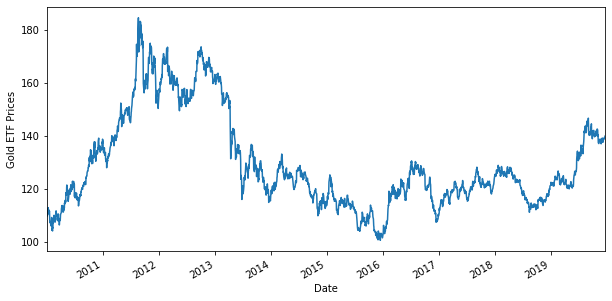

In [2]:
# Read data 
Df = yf.download('GLD','2010-01-01','2019-12-24')
# Only keep close columns 
Df=Df[['Close']] 
# Drop rows with missing values 
Df= Df.dropna() 
# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("Gold ETF Prices")
plt.show()

In [3]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2010-01-15,111.353333,111.123333
2010-01-19,111.476667,111.241111
2010-01-20,111.469999,111.443333
2010-01-21,110.440000,111.157778
2010-01-22,109.276667,110.774445


In [4]:
y = Df['Close']
y.head()

Date
2010-01-15    110.860001
2010-01-19    111.519997
2010-01-20    108.940002
2010-01-21    107.370003
2010-01-22    107.169998
Name: Close, dtype: float64

In [0]:
t=.75
t = int(t*len(Df)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [6]:
linear = LinearRegression().fit(X_train,y_train) 
print("Gold ETF Price =", round(linear.coef_[0],2), \
      "* 3 Days Moving Average", round(linear.coef_[1],2), \
      "* 9 Days Moving Average +", round(linear.intercept_,2))

Gold ETF Price = 1.21 * 3 Days Moving Average -0.21 * 9 Days Moving Average + 0.59


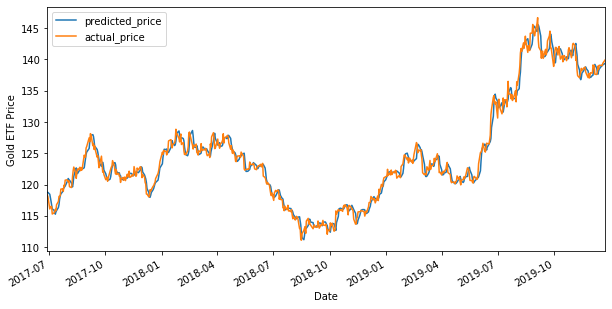

In [7]:
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Gold ETF Price")  
plt.show()

In [8]:
#goodness of fit
r2_score = linear.score(X[t:],y[t:])*100  
float("{0:.2f}".format(r2_score))

98.52